In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [22]:
import os
os.chdir(r's:\\Projects\\FlightFarePrediction\\FlightData')
os.getcwd()

's:\\Projects\\FlightFarePrediction\\FlightData'

In [23]:
os.listdir()

['Data_Train.xlsx',
 'Data_Train_null.xlsx',
 'plane fare prediction_final.ipynb',
 'Sample_submission.xlsx',
 'Test_set.xlsx']

In [24]:
train_data=pd.read_excel('Data_Train.xlsx')

##Display max columns = none will put no restrictions on display data. i.e. it will show all the columns. if display=2 then 2 columns will be shown

In [25]:
pd.set_option('display.max_columns',None)

In [26]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
train_data.shape

(10683, 11)

In [28]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Missing value treatment

To get the missing values of Route and Total stops we need to have the info of duration, source and destinations so we will first filter for the source and destination for which the values are missing and then take mode as the missing value imputation. We should consider source and destination here because if we do not filter for the source and destination and calculate the mode of total stops then it can take values of those sources which are not from delhi or cochin but route will depend on the duation and source and destintaions.

In [30]:
train_data[train_data['Route'].isnull()][['Source','Destination']]

,Source,Destination
9039,Delhi,Cochin


In [31]:
#filtering the source and destination
subset=train_data[(train_data['Source']=='Delhi') & (train_data['Destination']=='Cochin')] 

#calculating mode of Route and total stops
Mode_Route=subset['Route'].mode()
Mode_Total_Stops=subset['Total_Stops'].mode()

#fill the null values with mode
train_data['Route']=train_data['Route'].fillna(Mode_Route[0])
train_data['Total_Stops']=train_data['Total_Stops'].fillna(Mode_Total_Stops[0])


In [32]:
train_data.Total_Stops[0]

'non-stop'

###converting the date_of_journey to numerical variable from string

In [33]:
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y")

#separating day and month from date_of_journey column to single numerical variable from date

In [34]:
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
train_data['Journey_year']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [35]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


converting departure time to hr and minutes separately in two different columns.
Departure time is when a plane leaves the gate. We can extract this from date_of_journey column also if the date_of_journey column is given the departure time and arrival time

In [36]:
train_data['Dep_hr']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

converting arrival time to hr and minutes separately in two different columns.
arrival time is when a plane leaves the gate. We can extract this from date_of_journey column also if the date_of_journey column is given the departure time and arrival time

In [37]:
train_data['Arrival_Time']=pd.to_datetime(train_data.Arrival_Time)


In [38]:
train_data['Arrival_hr']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [39]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Journey_year       0
Dep_hr             0
Dep_min            0
Arrival_hr         0
Arrival_min        0
dtype: int64

#Extract hr and minutes from duration column

In [40]:
train_data.Duration.dtype

dtype('O')

# Extract the hr numbers and minute numbers from duration column using iterrows. 
where if len(str) is <4 i.e. only has '19h' or '50m' then
len<4, if len>3 i.e. '2h 50m' len is higher so in that case we will use len>3

In [41]:
train_data_copy=train_data.copy()
train_data_copy['Duration_hour']=train_data_copy['Duration'].str.extract('(\d+)h')
train_data_copy['Duration_minutes']=train_data_copy['Duration'].str.extract('(\d+)m')

In [42]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-09-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-09-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-09-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [43]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [44]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [45]:
train_data.Total_Stops.value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Convert total_stops to categorical values

In [46]:
train_data['stops']=train_data['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4])


In [47]:
# t=train_data[(train_data['Source']=='Delhi') & (train_data['Destination']=='Cochin')]
train_data['stops'].mode()

0    1
dtype: int64

In [48]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Journey_year       0
Dep_hr             0
Dep_min            0
Arrival_hr         0
Arrival_min        0
stops              0
dtype: int64

# For categorical variables:
    
If the variable is nominal then ONEHOTENCODING
If variable is ordinal then LABEL ENCODING

Onehot encoding is to convert the all the vars into variables with 0,1 values

label encoding is to convert all the vars into ranking column whcih wiull have 0,1,2,3,4 like that

#Source, airline, destination all the categorical and nominal so we will go with onehotencoding

In [49]:
train_data_copy2=train_data.copy()
ls_cat_vars=['Airline','Source','Destination']
for i in ls_cat_vars:
    train_data_copy2[i]=i +'_' +train_data_copy2[i]


In [50]:
train_data_copy2.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,stops
0,Airline_IndiGo,2019-03-24,Source_Banglore,Destination_New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,0
1,Airline_Air India,2019-05-01,Source_Kolkata,Destination_Banglore,CCU → IXR → BBI → BLR,05:50,2022-09-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,2


In [51]:
from sklearn.preprocessing import OneHotEncoder
encod=OneHotEncoder()
encoded_data=pd.DataFrame(encod.fit_transform(train_data_copy2[['Airline','Source','Destination']]).toarray())

In [52]:
cats=encod.categories_
cats
labels=np.concatenate(cats)

In [53]:
onehotdata=pd.DataFrame(encoded_data.values.tolist(),columns=labels)

In [54]:
onehotdata

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
final_train_data=train_data.join(onehotdata)

In [56]:
final_train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'stops', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [57]:
final_train_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
########NEXT steps- feature selection.

# To select the features we need to check the correlation matrix of all features so that we can have an idea of which vars to select. This is exploratory analyisis. So, we will use heatmap here to get the matrix

In [59]:
final_train_data_copy2=final_train_data.copy()

final_train_data_copy2.drop(['Airline','Date_of_Journey','Source','Destination','Route'],axis=1,inplace=True)
final_train_data_copy2.drop(['Arrival_Time','Duration','Total_Stops','Additional_Info','Dep_Time'],axis=1,inplace=True)

final_train_data_copy2.head()

,Price,Journey_day,Journey_month,Journey_year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,2019,22,20,1,10,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662,1,5,2019,5,50,13,15,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13882,9,6,2019,9,25,4,25,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6218,12,5,2019,18,5,23,30,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13302,1,3,2019,16,50,21,35,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


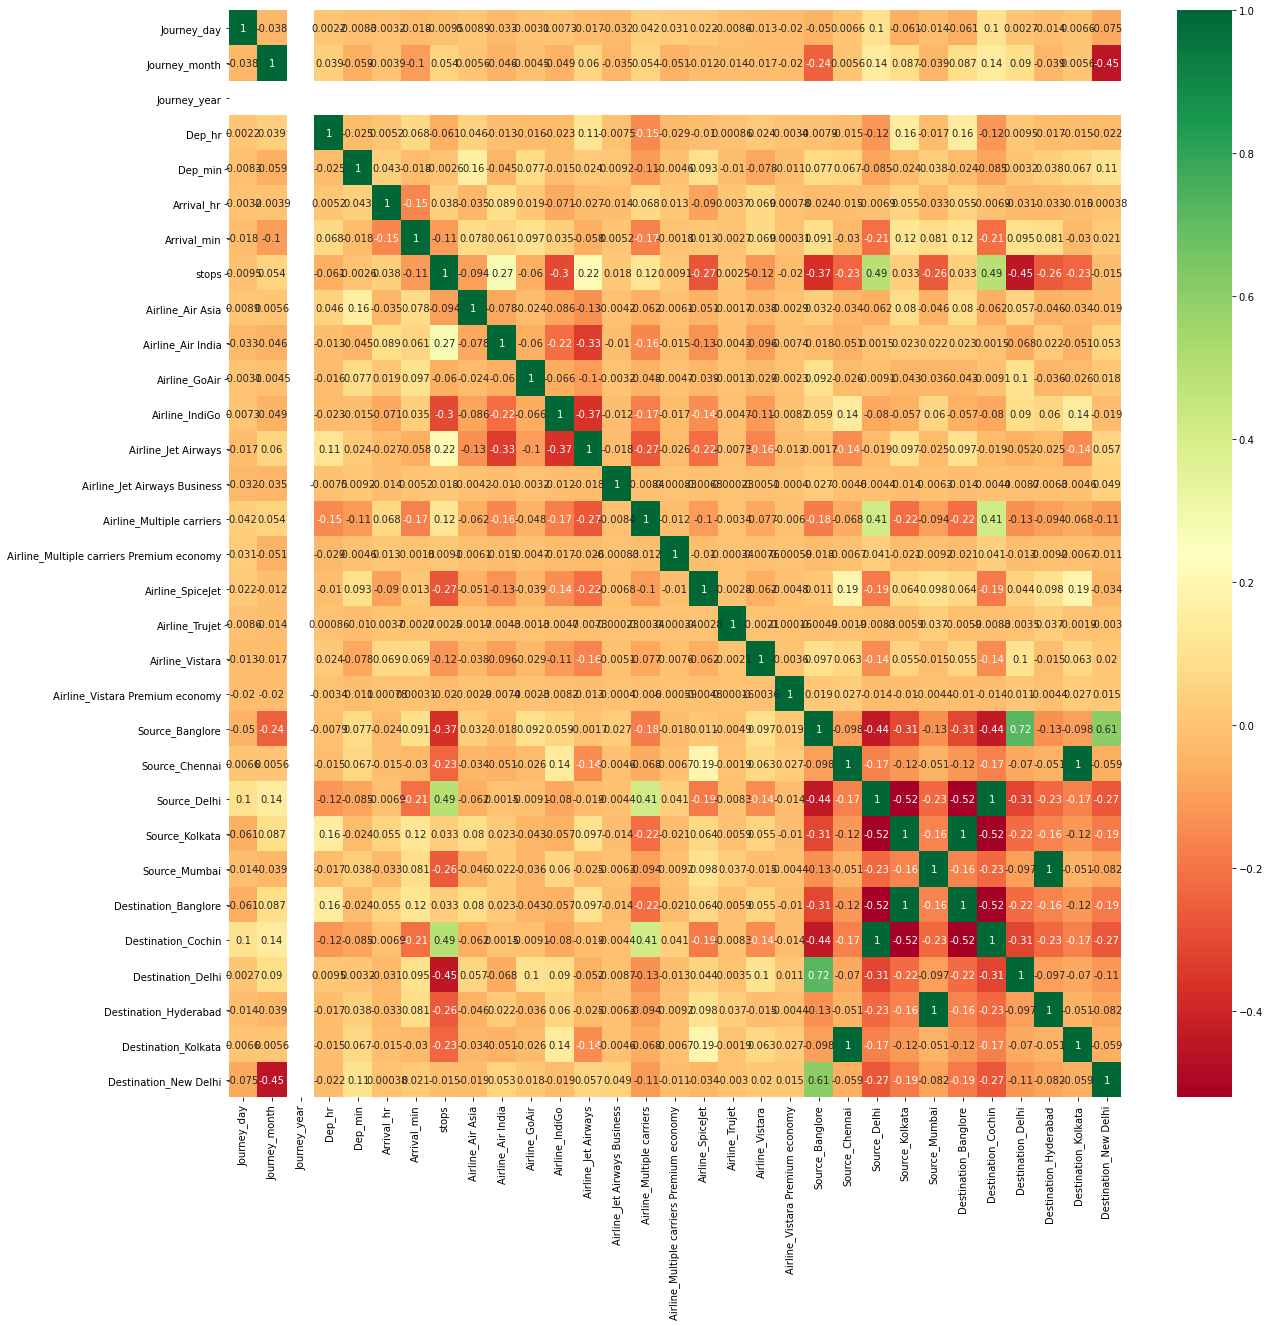

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
final_train_data_1= final_train_data_copy2.drop(['Price'],axis=1)
sns.heatmap(final_train_data_1.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [61]:
final_train_data_1.columns

Index(['Journey_day', 'Journey_month', 'Journey_year', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [62]:
X=final_train_data_1
y=final_train_data_copy2['Price']

To select the features we will use extra tree regressor here. Extra tree regressor is a method to select important features where it selects those features which has top ginis index or entropy. It shows and ranks the features based on its ginis index and impurity.

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
extratree= ExtraTreesClassifier(n_estimators=200,criterion='gini',max_features=2)
extratree.fit(X,y)

MemoryError: could not allocate 245104640 bytes

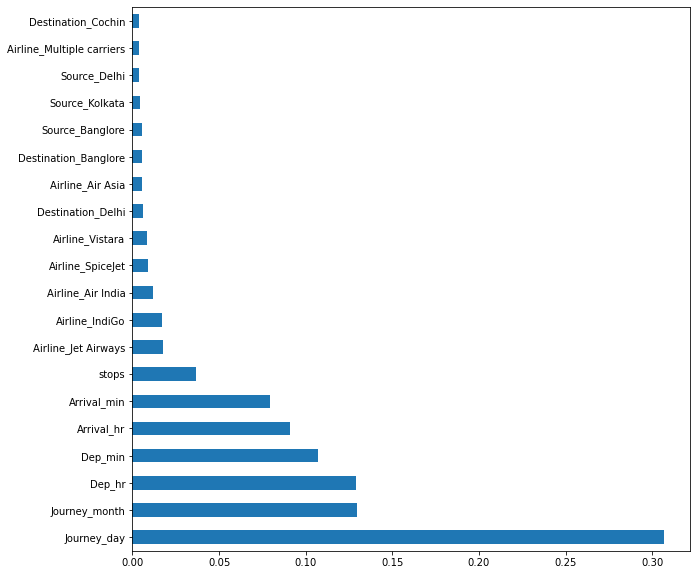

In [50]:

feature_importance=extratree.feature_importances_
selected_features=pd.Series(feature_importance,index=X.columns)
plt.figure(figsize=(10,10))
selected_features.nlargest(20).plot(kind='barh')
plt.show()